# Mini Project

## Project Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

#### We will handle this problem in a structured way. We will be following the table of content given below.

1).Problem Statement

2).Hypothesis Generation

3).Loading Packages and Data

4).Data Structure and Content

5).Exploratory Data Analysis

6).Univariate Analysis

7).Bivariate Analysis

8).Missing Value Treatment

9).Feature Engineering

10).Encoding Categorical Variables

11).Label Encoding

12).One Hot Encoding

13).PreProcessing Data

14).Modeling

15).Linear Regression

16).Regularized Linear Regression

17).RandomForest

18).XGBoost

19).Summary

#### Curriculum For This Project
1. The Business Problem Exploring
2. The Dataset
3. Exploratory Data Analysis (eda) - Outliers
4. Exploratory Data Analysis (eda) - Graphs
5. Converting Categorical To Numerical
6. Seperating Training And Test Data
7. Running The Models
8. Hyper Parameter Tuning XGB And GBR
9. Standard Scaling 06m Robust Scaling
10. Final Predictions On The Test Dataset
11. Saving The Final Model

In [1]:
# Importing pandas for data manipulation
import pandas as pd

# Importing numpy for numerical operations
import numpy as np


# Importing matplotlib for data visualization
import matplotlib.pyplot as plt

# Importing seaborn for advanced data visualization
import seaborn as sns


In [2]:
# Loading the test dataset from a CSV file
test = pd.read_csv('Test.csv')

# Loading the train dataset from a CSV file
train = pd.read_csv('Train.csv')


In [3]:
#view the head of test dataset
test.head() 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
#view the head of train dataset
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#check the shape of both test and train datasets
train.shape, test.shape

((8523, 12), (5681, 11))

In [6]:
#View the columns in both dataset
test.columns, train.columns

(Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales'],
       dtype='object'))

In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


The dataset has 4 columns with float data type, 1 column with int data type and 7 columns with object data type. The columns "Item_Weight" and "Outlet_Size" have missing values.

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


This is a summary of the test dataset which has 5681 entries and 11 columns. The columns are the same as the training dataset except for the Item_Outlet_Sales column which is absent, as it is the target variable that we need to predict using our model. The dataset contains both numerical and categorical features. There are missing values in the Item_Weight, Outlet_Size columns, which need to be handled before modeling.

In [11]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

This output shows the number of null values in each column of the training dataset. There are 1463 null values in the Item_Weight column and 2410 null values in the Outlet_Size column.

In [12]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

This output shows the number of null values in each column of the testing dataset. there are 976 null values in the Item_Weight column and 1606 null values in the Outlet_Size column.

In [13]:
# Fill null values in 'Item_Weight' column with the median value of the column of train dataset
train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)

# Fill null values in 'Outlet_Size' column with the mode value of the column of train dataset
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)


In [14]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

This output indicates that 'Item_Weight' & 'Outlet_size' columns in the dataset have been imputed with median & mode, resulting in no null values present in any column

In [15]:
# Fill null values in 'Item_Weight' column with the median value of the column of test dataset
test['Item_Weight'].fillna(test['Item_Weight'].median(), inplace=True)

# Fill null values in 'Outlet_Size' column with the mode value of the column of test dataset
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)

In [16]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

This output indicates that 'Item_Weight' & 'Outlet_size' columns in the dataset have been imputed with median & mode, resulting in no null values present in any column

In [17]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

We see there are some irregularities in the column and it is needed to fix them

In [19]:
train['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'],['Low Fat', 'Low Fat', 'Regular'], inplace=True)
test['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'],['Low Fat', 'Low Fat', 'Regular'], inplace=True)

In [20]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

<Axes: xlabel='Item_Visibility'>

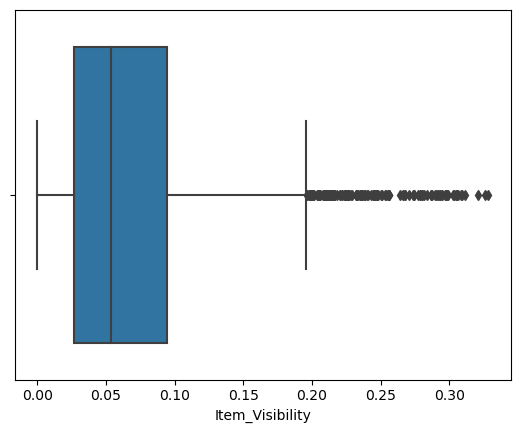

In [22]:
sns.boxplot(data=train, x='Item_Visibility')

In [23]:
from scipy.stats.mstats import winsorize

# Winsorize 'Item_Visibility' column to remove outliers
train['Item_Visibility'] = winsorize(train['Item_Visibility'], limits=(0.05, 0.05))

<Axes: xlabel='Item_Visibility'>

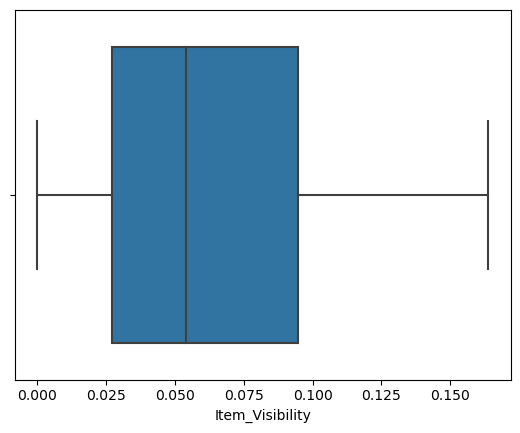

In [24]:
sns.boxplot(data=train, x='Item_Visibility')

In [25]:
train.shape, test.shape

((8523, 12), (5681, 11))

# EDA

In [26]:
# Select all columns in "train" that have a data type of "object"
categorical = train.select_dtypes(include =[object])

# Print the number of categorical features and their names
print(categorical.shape[1], "Categorical Features in Train Set are:")
print('\t' + '\n\t'.join(categorical.columns) + "\n")


7 Categorical Features in Train Set are:
	Item_Identifier
	Item_Fat_Content
	Item_Type
	Outlet_Identifier
	Outlet_Size
	Outlet_Location_Type
	Outlet_Type



### Categorical Analysis

#### 1.Item_Fat_Content

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

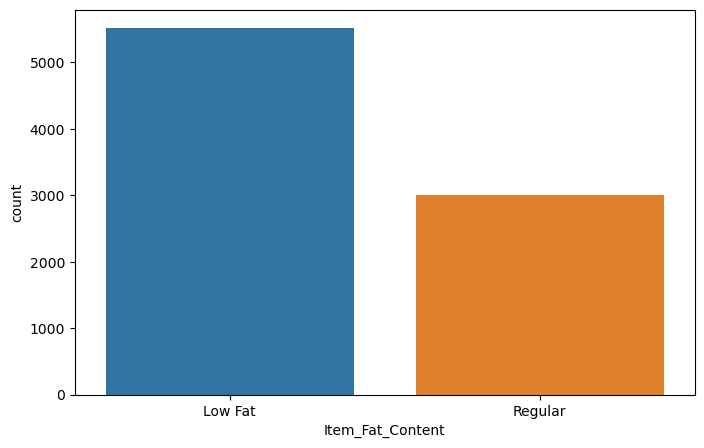

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(data=train, x='Item_Fat_Content')

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

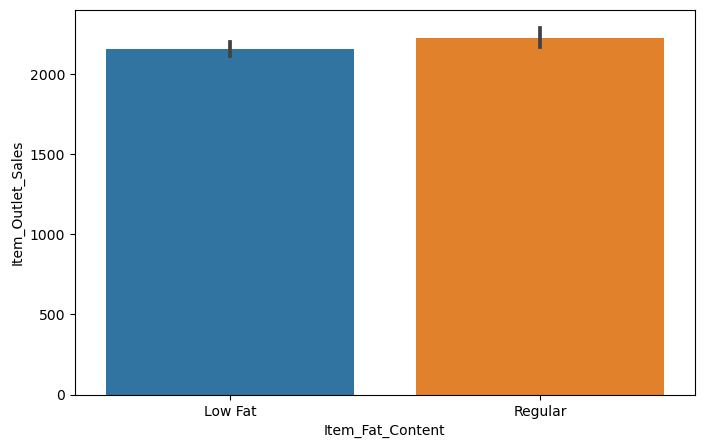

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(data=train, x='Item_Fat_Content', y='Item_Outlet_Sales')

### Observations:

The Items bought are more of Low Fat.

But Item Outles sales are almost same for both Low Fat and Regular Item Content

### 2. Item_Type

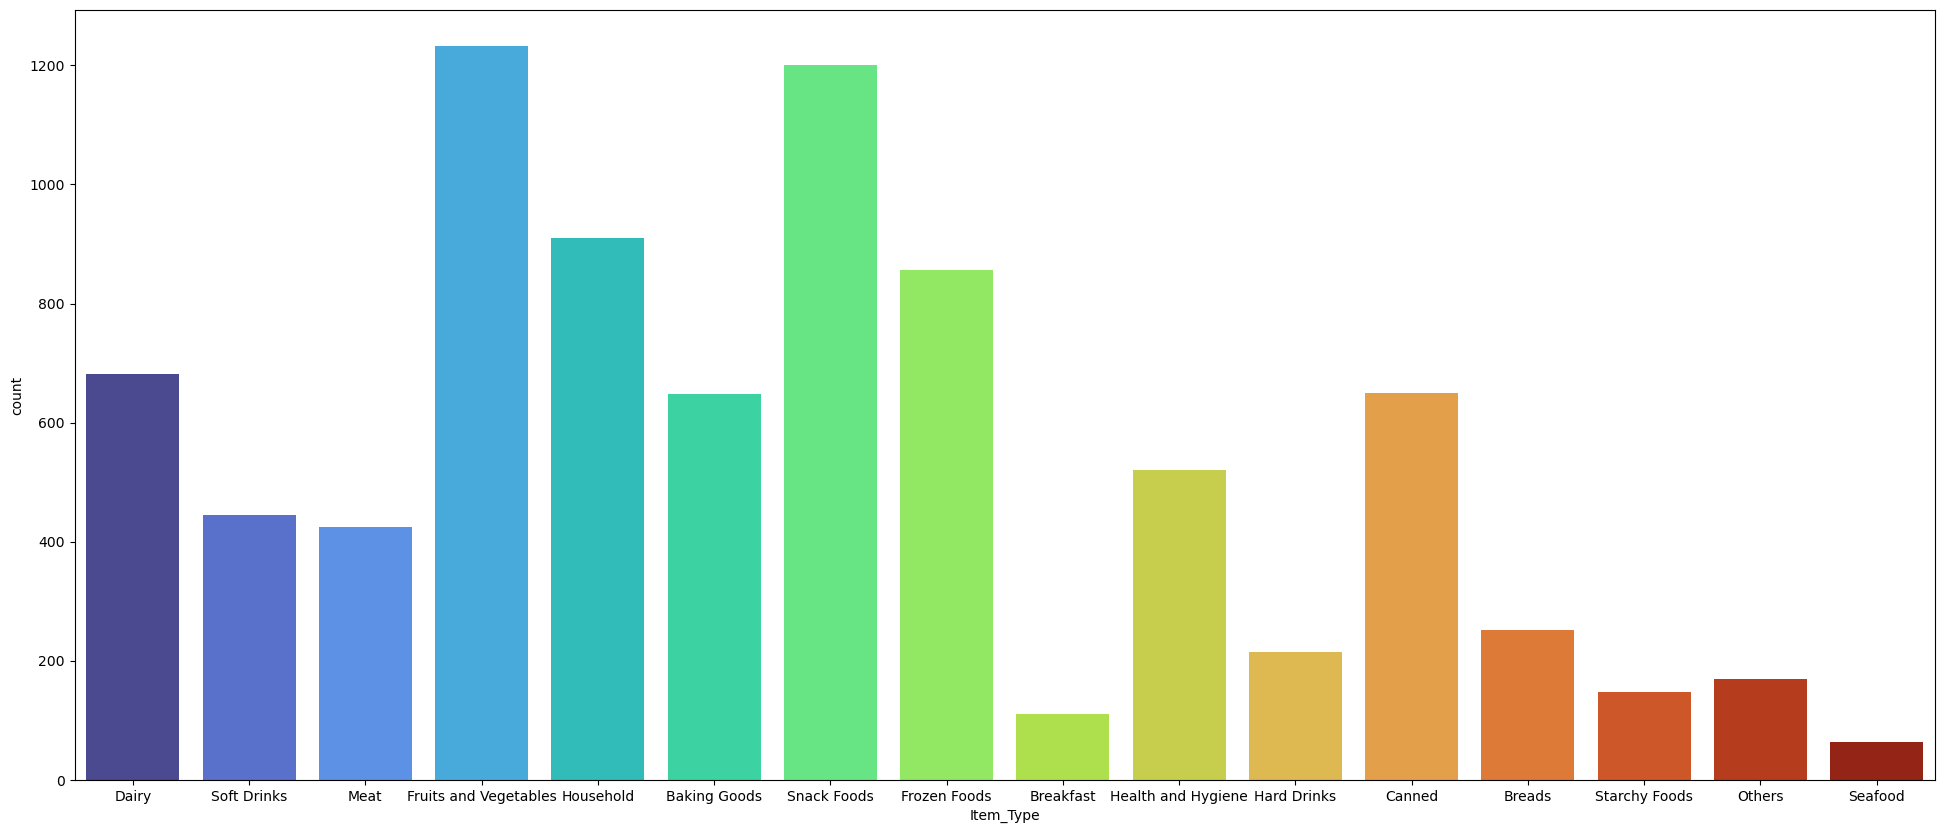

In [29]:
# Set the figure size to 20x8
plt.figure(figsize=(24,10))

# Create a count plot using Seaborn, and rotate the x-axis labels by 35 degrees
sns.countplot(data=train, x='Item_Type', palette='turbo', orient="h")

# Display the plot using Matplotlib
plt.show()


<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

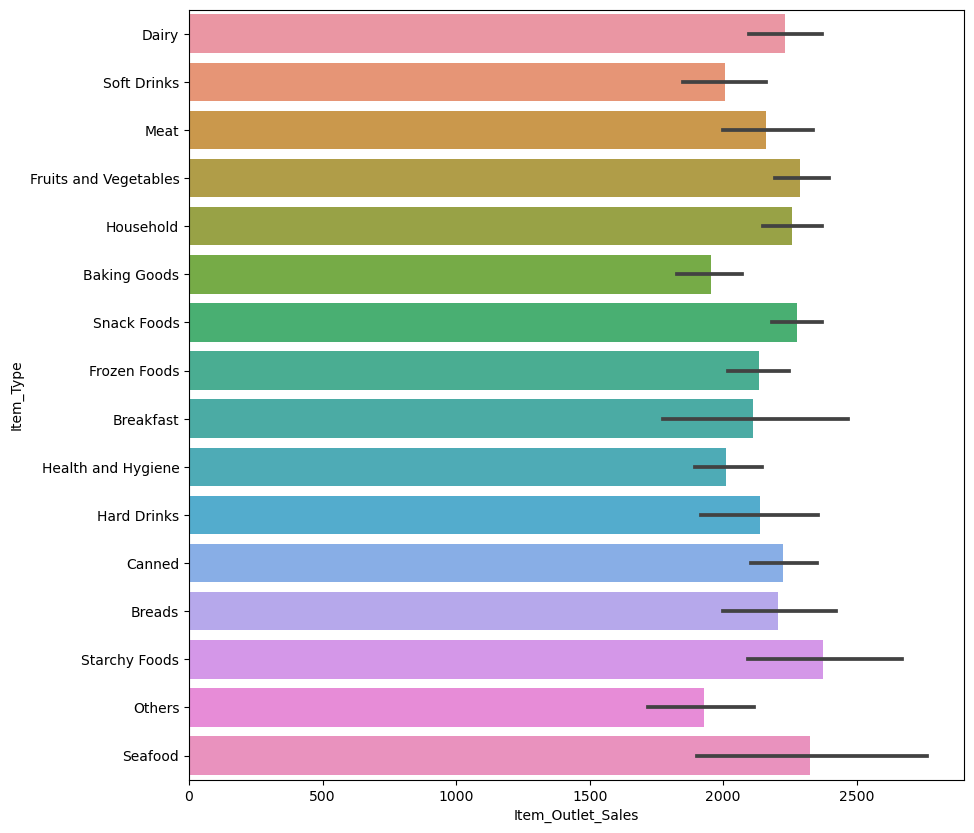

In [30]:
plt.figure(figsize=(10,10))
sns.barplot(data=train, y='Item_Type', x='Item_Outlet_Sales')

### Observations :

The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers

## 3.Outlet_Size

<Axes: xlabel='Outlet_Size', ylabel='count'>

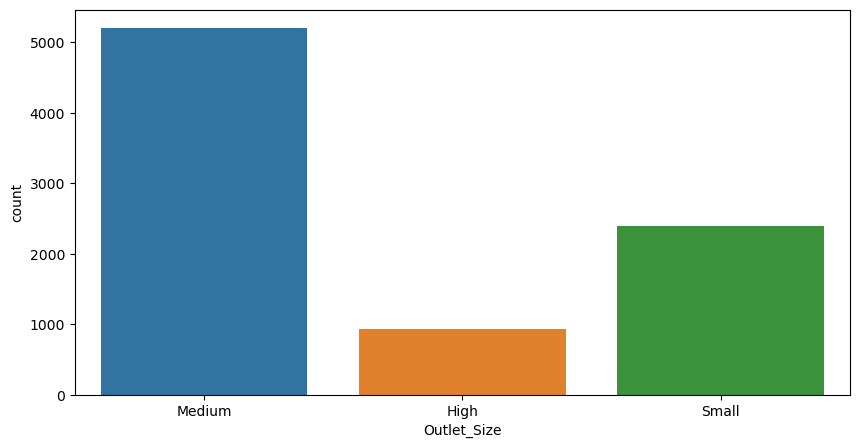

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='Outlet_Size')

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

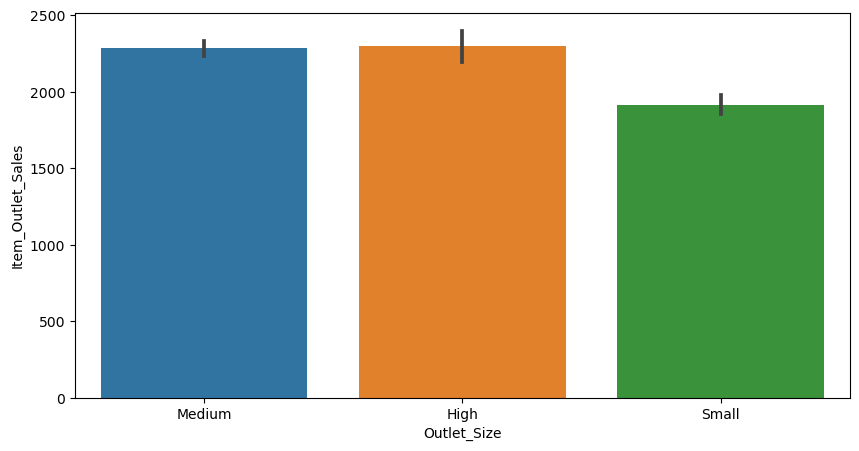

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='Outlet_Size', y='Item_Outlet_Sales')

### Observations:

The Outlets are more of Medium Size

But Outlet Sales is maximum for Medium and High sized Outlets so may be with High size Outlets can improve the Outlet Sales.

### 4. Outlet_Location_Type

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

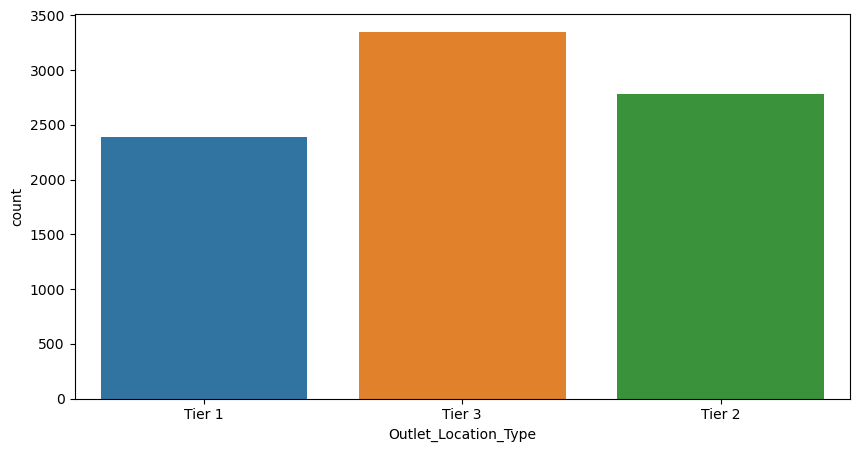

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='Outlet_Location_Type')

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

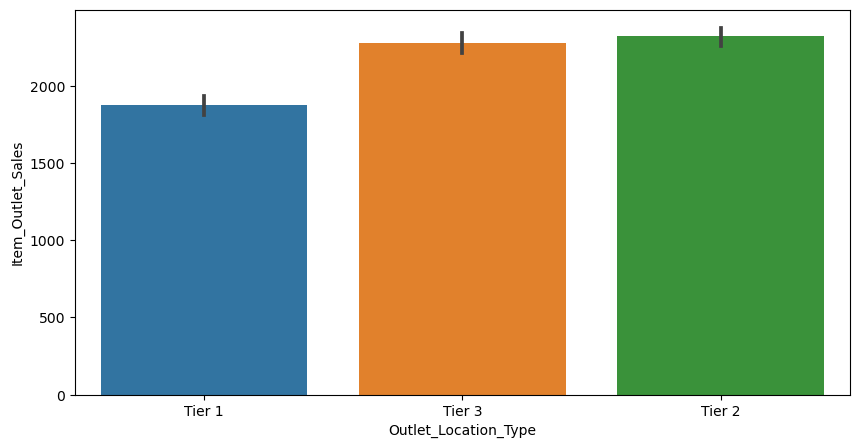

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='Outlet_Location_Type', y='Item_Outlet_Sales')

### Observations:

The Outlet Sales tend to be high for Tier3 and Tier 2 location types

But we have only Tier3 locations maximum Outlets

### 5. Outlet_Type

<Axes: xlabel='Outlet_Type', ylabel='count'>

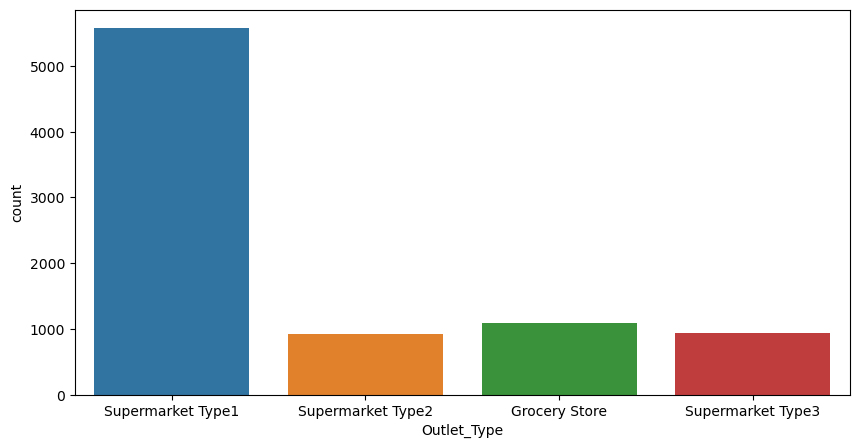

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='Outlet_Type')

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

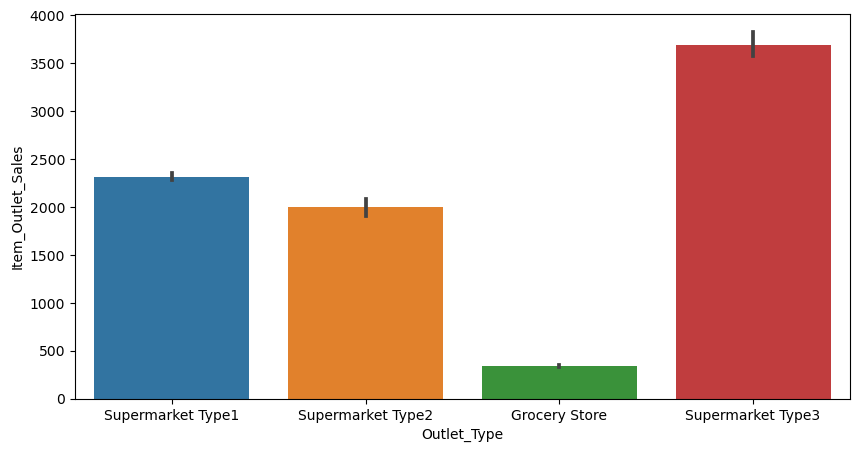

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='Outlet_Type', y='Item_Outlet_Sales')

### Observations:

The Outlets are more of Supermarket Type1.

But sales are more on Type 3

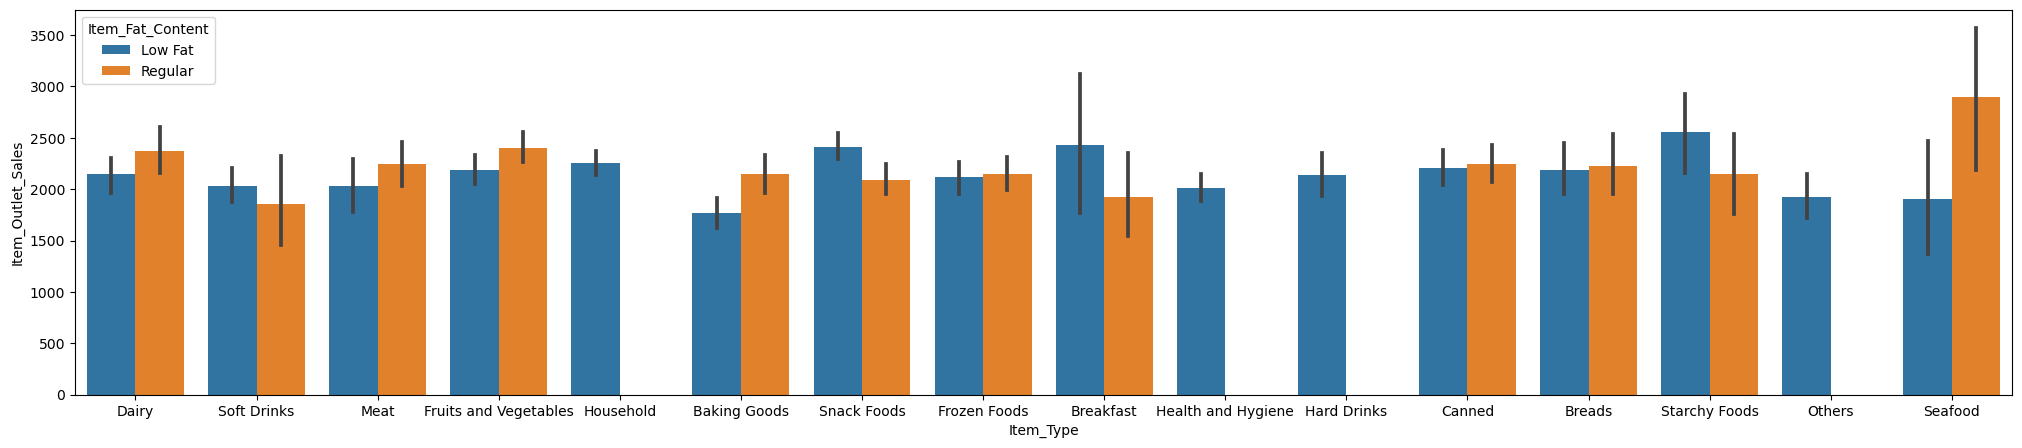

In [37]:
plt.figure(figsize=(25,5))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=train)
plt.show()

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

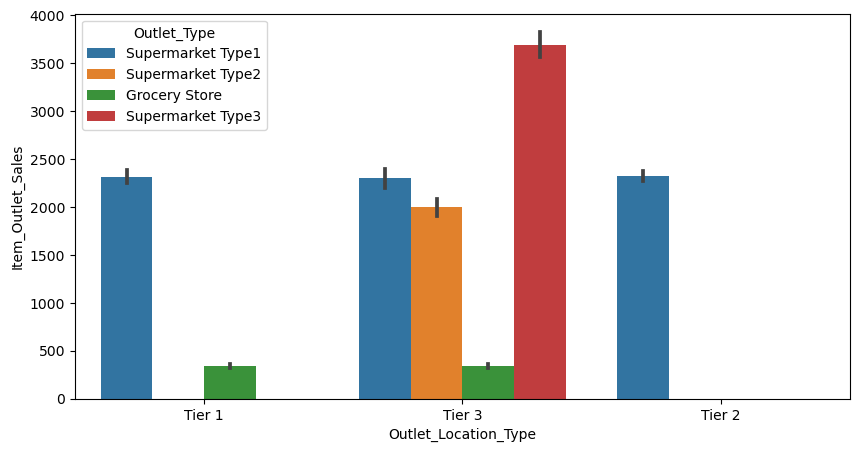

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',data=train)

### Observations:

The Tier-3 location type has all types of Outlet type and has high sales margin

##  Analysis on Numerical Features

In [39]:
# Selecting only numerical columns
num_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Printing the numerical column names
print("Numerical features: ")
for col in num_cols:
    print(col)

Numerical features: 
Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Item_Outlet_Sales


### 1. Item Weight

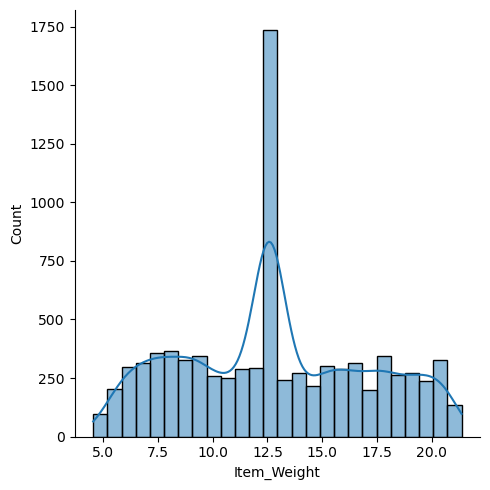

In [40]:
sns.displot(data=train, x=train.Item_Weight, kde=True)

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

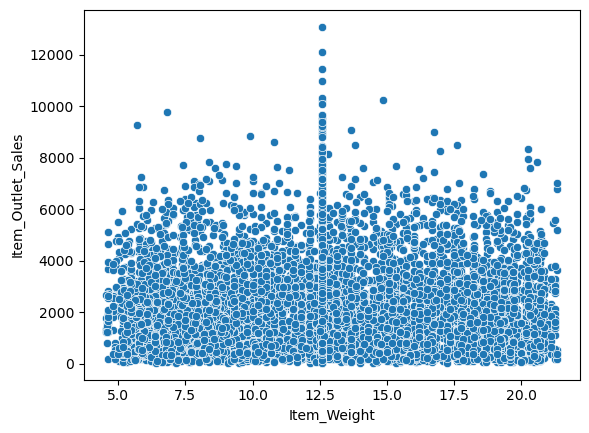

In [41]:
sns.scatterplot(data=train, x='Item_Weight', y='Item_Outlet_Sales')

### Observations:

We have more products of weight around 12.5, and sell is maximum for that weight

### 2. Item_Visibility

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

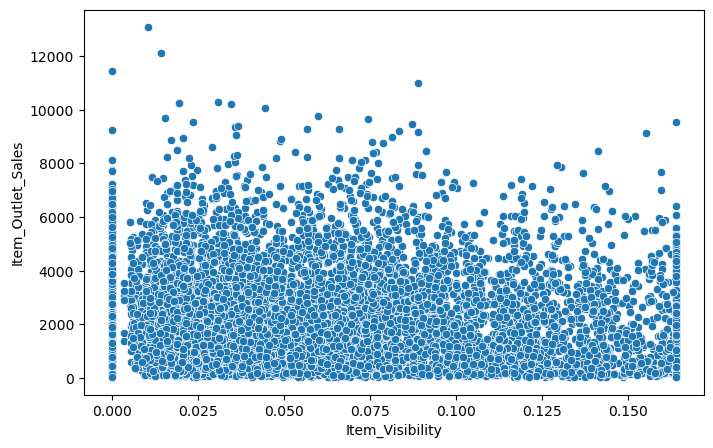

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=train, x='Item_Visibility',y='Item_Outlet_Sales')

In [43]:
train.Item_Visibility.min()

0.0

Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

In [44]:
train['Item_Visibility'].mean()


0.06435454226011969

In [45]:

train['Item_Visibility'].median()


0.053930934

In [46]:
train['Item_Visibility'].mode()

0    0.0
Name: Item_Visibility, dtype: float64

Lets consider it like missing information and impute it with median (as their are outlier) visibility of that product

In [47]:
train['Item_Visibility']=train['Item_Visibility'].replace(0, train['Item_Visibility'].median())
test['Item_Visibility']=test['Item_Visibility'].replace(0, test['Item_Visibility'].median())

replace any occurrence of the value '0' in the 'Item_Visibility' column of a 'train' with the median value of the 'Item_Visibility' column.

In [48]:
train.Item_Visibility.min()

0.003574698

We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers

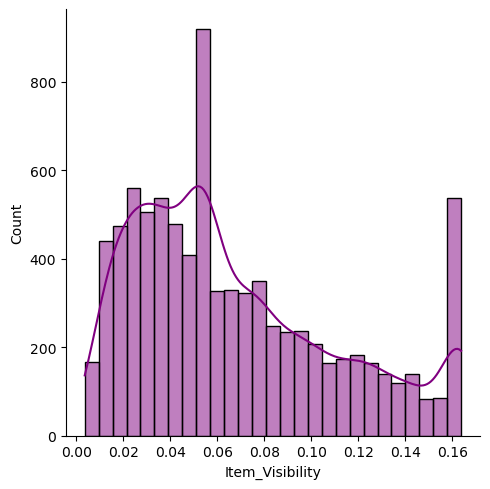

In [49]:
sns.displot(x=train.Item_Visibility, color='purple', kde=True)

### Observation:

1. We have Items having Visibility 0 to 0.2 is more.
2. And Items having Visibility around 0.05 is maximum.
3. Sales is more for Items having Visibility 0 to 0.2
4. Positive skewness

### 3. Item MRP

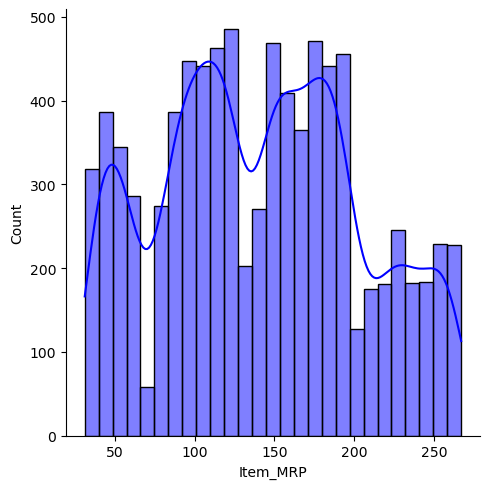

In [50]:
sns.displot(x=train.Item_MRP, color='blue', kde=True)
plt.show()

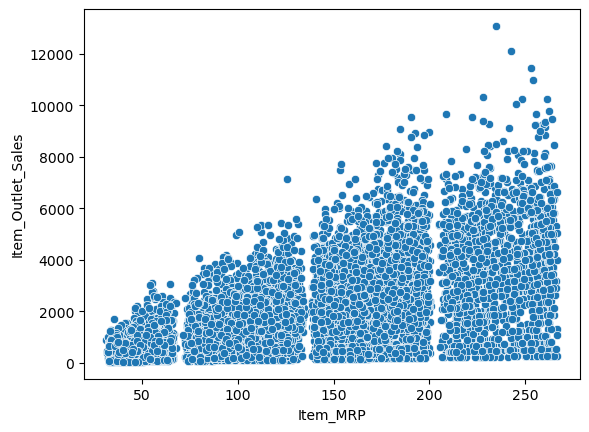

In [51]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=train)
plt.show()

### Observations:

1. We have good amount of products for 50 MRP, 100 MRP ,180 MRP
2. But MRP ranging from 200-250 dollars is having high Sales.

### 4. Outlet_Establishment_Year

In [52]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2023 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2023 - x)

This code creates two new columns in the named train and test called 'Years_Established'. The values in the new columns are calculated by subtracting the 'Outlet_Establishment_Year' column from the year 2023, which gives the number of years that each outlet has been in operation.

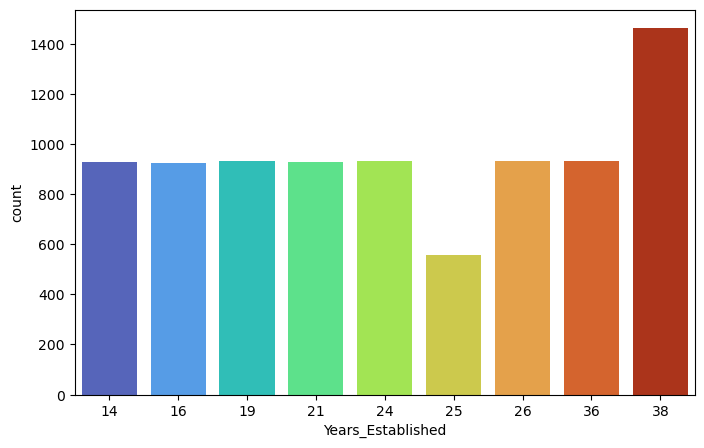

In [53]:
plt.figure(figsize=(8,5))
sns.countplot(x='Years_Established',data=train,palette='turbo')
plt.show()

<Axes: xlabel='Years_Established', ylabel='Item_Outlet_Sales'>

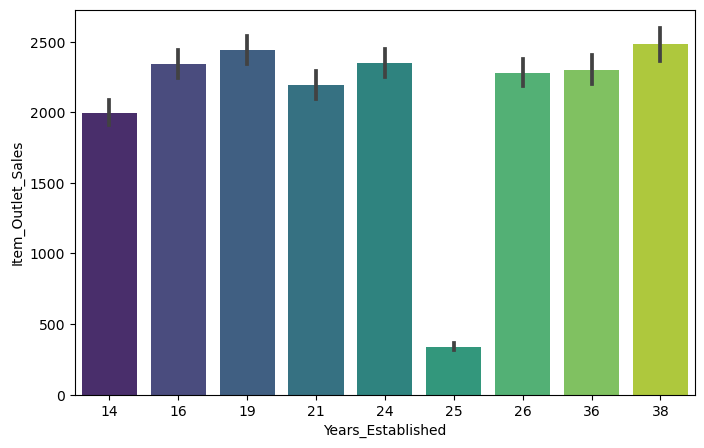

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=train,palette='viridis')

### Observations:

1. It is quiet evident that Outlets established 36 years before is having good Sales margin.
2. We also have a outlet which was established before 23 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.

In [55]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36


/var/folders/dh/0y8j2hhs5knfhnwd7g9f92yw0000gn/T/ipykernel_23780/29738443.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr() ,cmap='GnBu', annot=True)


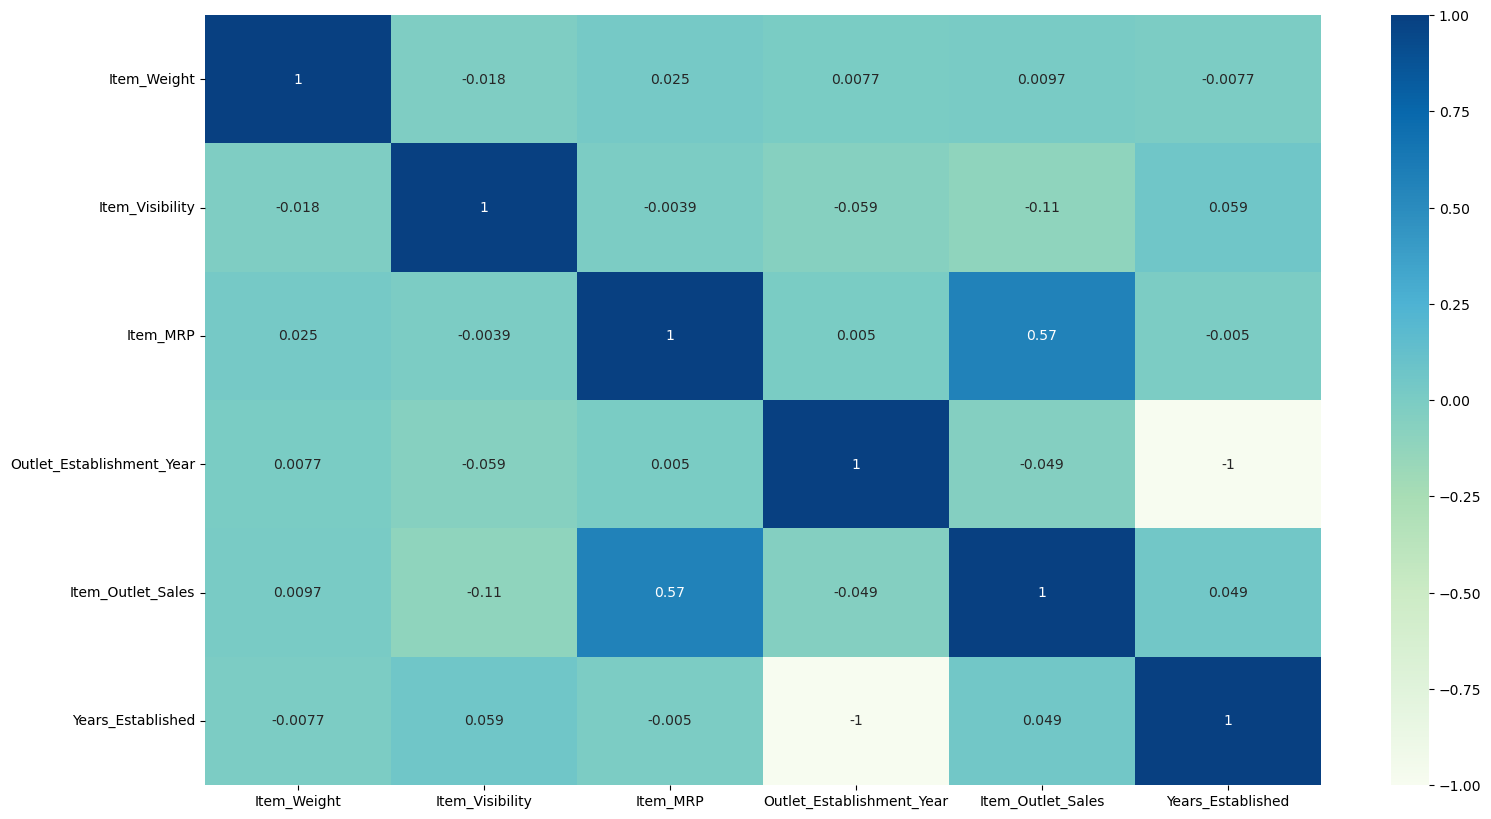

In [56]:
plt.figure(figsize=(18,10))
sns.heatmap(train.corr() ,cmap='GnBu', annot=True)
plt.show()

# Pre-Processing the Dataset

#### Remove the skweness 

In [57]:
train.Item_Visibility.describe()

/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    8523.000000
mean        0.067683
std         0.043731
min         0.003575
25%         0.033085
50%         0.053931
75%         0.094585
max         0.163806
Name: Item_Visibility, dtype: float64

In [58]:
train.Item_Visibility = train.Item_Visibility.apply(np.log1p)

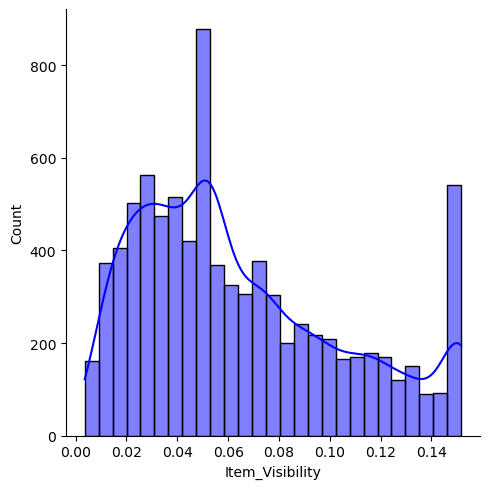

In [59]:
sns.displot(x=train.Item_Visibility, color='blue', kde=True)
plt.show()

In [60]:
train.Item_Visibility.describe()

/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    8523.000000
mean        0.064668
std         0.040395
min         0.003568
25%         0.032550
50%         0.052527
75%         0.090376
max         0.151695
Name: Item_Visibility, dtype: float64

# Feature Engineering

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode categorical variables in the training dataset
for i in categorical.columns:
    train[i] = le.fit_transform(train[i])
    
# Encode categorical variables in the testing dataset
for i in categorical.columns:
    test[i] = le.fit_transform(test[i])


In [63]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,156,9.30,0,0.015920,4,249.8092,9,1999,1,0,1,3735.1380,24
1,8,5.92,1,0.019095,14,48.2692,3,2009,1,2,2,443.4228,14
2,662,17.50,0,0.016621,10,141.6180,9,1999,1,0,1,2097.2700,24
3,1121,19.20,1,0.052527,6,182.0950,0,1998,1,2,0,732.3800,25
4,1297,8.93,0,0.052527,9,53.8614,1,1987,0,2,1,994.7052,36


We can see Item_Outlet_Sales is highly correlated with Item_MRP, i.e. if Item_MRP increases, Item_Outlet_Sales increases.



# Train Test Split

In [64]:
train.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,156,9.3,0,0.01592,4,249.8092,9,1999,1,0,1,3735.138,24


In [65]:
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

X.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,156,9.30,0,0.015920,4,249.8092,9,1999,1,0,1,24
1,8,5.92,1,0.019095,14,48.2692,3,2009,1,2,2,14


In [66]:
from sklearn.preprocessing import PowerTransformer
power_t = PowerTransformer(method = 'yeo-johnson')
X = pd.DataFrame(power_t.fit_transform(X), columns=X.columns)
X.head()

/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,-1.461039,-0.808889,-0.738147,-1.443825,-0.712347,1.623670,1.427394,0.048562,-0.293295,-1.373843,-0.123488,0.029627
1,-2.093858,-1.738575,1.354743,-1.311811,1.504660,-1.595016,-0.548577,1.461925,-0.293295,1.088324,1.040591,-1.590639
2,-0.154018,1.094638,-0.738147,-1.414304,0.684390,0.081237,1.427394,0.048562,-0.293295,-1.373843,-0.123488,0.029627
3,0.773522,1.449766,1.354743,-0.146187,-0.215420,0.689968,-1.809119,-0.075796,-0.293295,1.088324,-1.915952,0.151483
4,1.098294,-0.905013,-0.738147,-0.146187,0.468410,-1.476078,-1.343810,-1.270835,-1.925925,1.088324,-0.123488,1.231718


In [67]:
X.skew().sort_values()

Item_Identifier             -0.293700
Outlet_Location_Type        -0.220632
Outlet_Identifier           -0.213935
Outlet_Establishment_Year   -0.200959
Item_Type                   -0.164574
Item_MRP                    -0.115386
Item_Weight                 -0.062510
Outlet_Size                 -0.042980
Outlet_Type                  0.007863
Years_Established            0.009409
Item_Visibility              0.121002
Item_Fat_Content             0.616705
dtype: float64

### Scaling the Data

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,-1.461039,-0.808889,-0.738147,-1.443825,-0.712347,1.623670,1.427394,0.048562,-0.293295,-1.373843,-0.123488,0.029627
1,-2.093858,-1.738575,1.354743,-1.311811,1.504660,-1.595016,-0.548577,1.461925,-0.293295,1.088324,1.040591,-1.590639
2,-0.154018,1.094638,-0.738147,-1.414304,0.684390,0.081237,1.427394,0.048562,-0.293295,-1.373843,-0.123488,0.029627
3,0.773522,1.449766,1.354743,-0.146187,-0.215420,0.689968,-1.809119,-0.075796,-0.293295,1.088324,-1.915952,0.151483
4,1.098294,-0.905013,-0.738147,-0.146187,0.468410,-1.476078,-1.343810,-1.270835,-1.925925,1.088324,-0.123488,1.231718


### Principle Component Analysis

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12, svd_solver="full")
X = pd.DataFrame(pca.fit_transform(X), columns=X.columns)
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,-1.339795,0.516273,-1.127939,0.514529,0.905464,-1.059574,1.091469,1.310433,-1.690824,1.132464,-0.022652,0.005168
1,0.264463,-2.781664,-0.540414,1.553441,2.987434,0.743998,-0.454279,0.899193,1.378430,-0.428711,0.025407,0.046805
2,-1.297514,0.532688,-1.636925,-0.872633,0.021439,-0.257711,-0.843430,0.836964,-0.247089,1.149962,-0.030136,0.004878
3,1.380100,-0.227180,1.939377,-0.771507,-1.481914,-1.110323,-0.711356,1.402602,0.787730,-0.526141,-0.457007,-0.034240
4,2.965252,0.726924,-0.022835,-0.686367,0.089562,2.028359,0.429433,0.177589,0.621084,0.562975,0.054327,-0.001003


### Checking Multicollinearity

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif=pd.DataFrame()
    vif['variables']=X.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

calc_vif(X)

,variables,VIF FACTOR
0,Item_Identifier,1.0
1,Item_Weight,1.0
2,Item_Fat_Content,1.0
3,Item_Visibility,1.0
4,Item_Type,1.0
5,Item_MRP,1.0
6,Outlet_Identifier,1.0
7,Outlet_Establishment_Year,1.0
8,Outlet_Size,1.0
9,Outlet_Location_Type,1.0


### Finding Best Random State For Regression Models

In [71]:
from sklearn.model_selection import train_test_split

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

max_Accu=0
max_RS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>max_Accu:
        max_Accu=r2
        max_RS=i

print("Best r2 score is", max_Accu,"on Random State", max_RS)


Best r2 score is 0.5829559124926962 on Random State 247


### Feature Importance

,Importance
Features,
Item_MRP,0.305
Item_Fat_Content,0.172
Outlet_Identifier,0.132
Item_Identifier,0.063
Outlet_Location_Type,0.057
Years_Established,0.053
Outlet_Size,0.044
Item_Type,0.041
Item_Weight,0.036


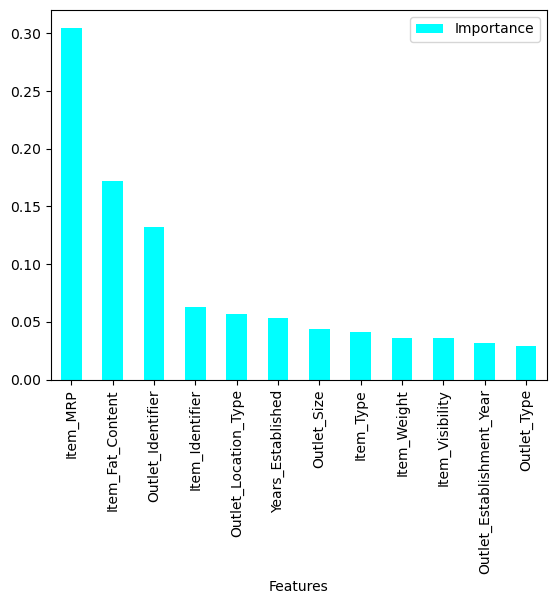

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='cyan')
importances

In [74]:
X.shape, y.shape

((8523, 12), (8523,))

In [75]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((6818, 12), (1705, 12), (1705,), (6818,))

In [76]:
import statsmodels.api as sm

In [77]:
import statsmodels.api as sm

# Create a linear regression model and fit it to the data
Lr_model = sm.OLS(y_train, X_train)
results = Lr_model.fit()

# Print the regression coefficients and other statistics
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.204
Model:                            OLS   Adj. R-squared (uncentered):              0.202
Method:                 Least Squares   F-statistic:                              145.2
Date:                Thu, 22 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:20:15   Log-Likelihood:                         -62918.
No. Observations:                6818   AIC:                                  1.259e+05
Df Residuals:                    6806   BIC:                                  1.259e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [78]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# create a Lasso model and fit it to the training data
lasso_model = Lasso(alpha=0.1) # set the regularization strength
lasso_model.fit(X_train, y_train)

# make predictions on the test data
y_pred = lasso_model.predict(X_test)

# calculate the mean squared error and R-squared for the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the model coefficients and other statistics
print("Lasso Regression Report\n")
print("Model coefficients:")
print(lasso_model.coef_)
print("\nModel intercept:")
print(lasso_model.intercept_)
print("\nModel performance:")
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))


Lasso Regression Report

Model coefficients:
[   72.48371488   -41.03381498  -565.88943062   150.82299086
  -130.87289479  -841.14183595   474.44668454  -262.90925738
  -151.73173237    69.60070518   386.67313622 -8355.15284087]

Model intercept:
2180.668402770726

Model performance:
Mean squared error: 1373686.52
R-squared: 0.55


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# create a Random Forest model and fit it to the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=100)
rf_model.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf_model.predict(X_test)

# calculate the mean squared error and R-squared for the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the model feature importances and other statistics
print("Random Forest Regression Report\n")
print("Feature importances:")
print(rf_model.feature_importances_)
print("\nModel performance:")
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))


Random Forest Regression Report

Feature importances:
[0.06131699 0.03492324 0.17400576 0.03594895 0.04137535 0.30564906
 0.1311248  0.03160013 0.04320771 0.05827883 0.03052998 0.05203919]

Model performance:
Mean squared error: 1359925.87
R-squared: 0.55


In [80]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=100)
xgb_model.fit(X_train, y_train)

# Predict on the test set and calculate metrics
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the report
print("XGBoost Regression Report\n")
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


XGBoost Regression Report

Mean squared error: 1455898.82
R-squared: 0.52


In [81]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Create and fit the XGBoost model with hyperparameters
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=100, learning_rate=0.1, n_estimators=100, max_depth=3)
xgb_model.fit(X_train, y_train)

# Predict on the test set and calculate metrics
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the report
print("XGBoost Regression Report\n")
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

XGBoost Regression Report

Mean squared error: 1275999.55
R-squared: 0.58


#### Add some hyperparameters to increase the model performance

In [82]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Create the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=100)

# Define the hyperparameters to search
params = {'n_estimators': [50, 100, 200],
          'learning_rate': [0.01, 0.05, 0.1],
          'max_depth': [3, 5, 7],
          'min_child_weight': [1, 3, 5]}

# Create the grid search object
grid_search = GridSearchCV(xgb_model, params, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the test set and calculate metrics
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the report
print("XGBoost Regression Report\n")
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Best parameters: {grid_search.best_params_}")


XGBoost Regression Report

Mean squared error: 1270126.35
R-squared: 0.58
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}


In [83]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=100, ...)

In [84]:
import pickle

# save the trained model in a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

with open('lasso_model.pkl', 'wb') as file:
    pickle.dump(lasso_model, file)

with open('Lr_model.pkl', 'wb') as file:
    pickle.dump(Lr_model, file)
    
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
    

In [85]:
# Define the preprocess_input function to preprocess the input data
def preprocess_input(input_data):
    # Your preprocessing code goes here
    preprocessed_data = input_data # Replace this with your actual preprocessing code
    return preprocessed_data

### Predicting feature Values

In [86]:
xgb_model.predict(X_test)

array([3427.4653, 2070.903 , 4223.4873, ..., 3758.579 , 1850.8914,
       4456.1475], dtype=float32)

In [87]:
lasso_model.predict(X_test)

array([3814.26909348, 2911.29841054, 3403.23715195, ..., 2939.29753696,
       2035.47691308, 3096.47760132])

In [88]:
rf_model.predict(X_test)

array([3596.838024, 1844.126182, 3682.93928 , ..., 3237.925218,
       1845.317964, 2864.424734])

In [89]:
import pickle

# Load the saved models and evaluate their performance on the test set
try:
    loaded_model_lr = pickle.load(open("Lr_model.pkl", "rb"))
    result_lr = loaded_model_lr.score(X_test, y_test)
    print("Linear Regression model accuracy: %.2f%%" % (result_lr * 100))
except:
    print("Failed to load Linear Regression model")

try:
    loaded_model_lasso = pickle.load(open("lasso_model.pkl", "rb"))
    result_lasso = loaded_model_lasso.score(X_test, y_test)
    print("Lasso Regression model accuracy: %.2f%%" % (result_lasso * 100))
except:
    print("Failed to load Lasso Regression model")

try:
    loaded_model_rf = pickle.load(open("rf_model.pkl", "rb"))
    result_rf = loaded_model_rf.score(X_test, y_test)
    print("Random Forest model accuracy: %.2f%%" % (result_rf * 100))
except:
    print("Failed to load Random Forest model")

try:
    loaded_model_xgb = pickle.load(open("xgb_model.pkl", "rb"))
    result_xgb = loaded_model_xgb.score(X_test, y_test)
    print("XGBoost model accuracy: %.2f%%" % (result_xgb * 100))
except:
    print("Failed to load XGBoost model")


Failed to load Linear Regression model
Lasso Regression model accuracy: 54.55%
Random Forest model accuracy: 55.00%
XGBoost model accuracy: 51.83%


In [90]:
pred_xgb = loaded_model_xgb.predict(X_test)
pred_lasso = loaded_model_lasso.predict(X_test)
pred_rf = loaded_model_rf.predict(X_test)

In [91]:
Orginal_pred_xgb = xgb_model.predict(X_test)

In [92]:
conclusion = pd.DataFrame({'Original': Orginal_pred_xgb, 
                           'XGBoost Predicted Values': pred_xgb, 
                           'Lasso Predicted Value': pred_lasso, 
                           'Random Forest Regressor Predicted Values': pred_rf})
conclusion

,Original,XGBoost Predicted Values,Lasso Predicted Value,Random Forest Regressor Predicted Values
0,3427.465332,3427.465332,3814.269093,3596.838024
1,2070.903076,2070.903076,2911.298411,1844.126182
2,4223.487305,4223.487305,3403.237152,3682.939280
3,3489.903076,3489.903076,3026.251929,2828.944252
4,3133.613281,3133.613281,3340.992926,2803.956778
...,...,...,...,...
1700,1798.929199,1798.929199,2744.903470,1713.509538
1701,2775.563965,2775.563965,3463.462730,3403.296622
1702,3758.579102,3758.579102,2939.297537,3237.925218
1703,1850.891357,1850.891357,2035.476913,1845.317964
